## IMDB Sentiment Classification with TF‑IDF + Logistic Regression

In [7]:
import time
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load IMDB dataset
start = time.time()
imdb = load_dataset("imdb")
print(f"Dataset load time: {time.time() - start:.2f} seconds")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1, 2))

X_train = imdb["train"]["text"]
y_train = imdb["train"]["label"]

X_test = imdb["test"]["text"]
y_test = imdb["test"]["label"]

start = time.time()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(f"Vectorization time: {time.time() - start:.2f} seconds")

# Logistic Regression training
clf = LogisticRegression(random_state=42, max_iter=1000)

start = time.time()
clf.fit(X_train, y_train)
print(f"Training time: {time.time() - start:.2f} seconds")

Dataset load time: 1.20 seconds
Vectorization time: 25.39 seconds
Training time: 1.15 seconds


## Model Evaluation

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predict = clf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_predict):.3f}")
print(f"precision: {precision_score(y_test, y_predict):.3f}")
print(f"recall: {recall_score(y_test, y_predict):.3f}")
print(f"f1 score: {f1_score(y_test, y_predict):.3f}")

accuracy: 0.882
precision: 0.880
recall: 0.885
f1 score: 0.883


## Label Names in the IMDB Dataset

In [9]:
labels = imdb["train"].features["label"].names
labels

['neg', 'pos']

## Visualizing the Confusion Matrix

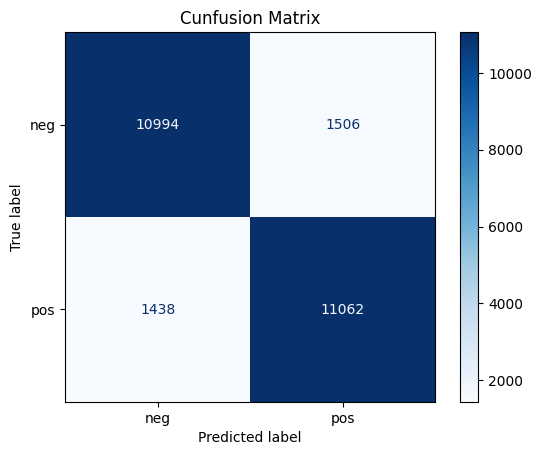

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

disp.plot(cmap="Blues")
plt.title("Cunfusion Matrix");